# Module 1: Data Wrangling

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df.replace('?', np.nan,inplace = True)

In [4]:
missing_val = df.isnull()

In [5]:
for col in missing_val.columns.values.tolist():
    print(col)
    print(missing_val[col].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [6]:
mean = df['normalized-losses'].astype('float').mean(axis = 0)
df['normalized-losses'].replace(np.nan, mean,inplace =True)

In [7]:
freq = df['num-of-doors'].value_counts().idxmax()

In [8]:
df['num-of-doors'].replace(np.nan, 'four', inplace = True)

In [9]:
mean = df['bore'].astype('float').mean(axis = 0)
df['bore'].replace(np.nan, mean, inplace = True)

In [10]:
mean_stroke = df['stroke'].astype('float').mean(axis = 0)
mean_horsepower = df['horsepower'].astype('float').mean(axis = 0)
mean_peak_rpm = df['peak-rpm'].astype('float').mean(axis = 0)

In [11]:
df['stroke'].replace(np.nan, mean_stroke, inplace = True)
df['horsepower'].replace(np.nan, mean_horsepower, inplace = True)
df['peak-rpm'].replace(np.nan, mean_peak_rpm, inplace = True)

In [12]:
df.dropna(subset=['price'], axis = 0, inplace = True)

In [13]:
df['city-L/100km'] = 235/df['city-mpg']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.00,102,5500,24,30,13950,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.00,115,5500,18,22,17450,13.055556
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,8.50,110,5500,19,25,15250,12.368421
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.4,8.50,110,5500,19,25,17710,12.368421
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.4,8.50,110,5500,19,25,18920,12.368421
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.4,8.30,140,5500,17,20,23875,13.823529
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.5,2.8,8.80,101,5800,23,29,16430,10.217391


1. I have Cleaned the data above by replacing Null values using mean and other methods also standarized the data such as city-mpg to city-L/100km
2. Now doing Normalization..

In [14]:
df['peak-rpm'] = df['peak-rpm'].astype('float')/df['peak-rpm'].astype('float').max()

# Module 2: Exploratory Data Analysis

From This point onwards, i'll be doing Exploratory Data Analysis which inloves analysis using plots etc to determine which charateristics has more impact on the target variable

In [15]:
%%capture
! pip install seaborn

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# How to choose the right visualization method?
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [17]:
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
city-L/100km         float64
dtype: object


Because some the data types are wrong e.g price is Integer but in here it's object, we can't find corrleation between objects.. we need to convert them into right format

In [18]:
df[['normalized-losses']] = df[['normalized-losses']].astype('int')
df[['bore', 'stroke']] = df[['bore', 'stroke']].astype('float')
df[['price']] = df[['price']].astype('int')
df[['horsepower']] = df[['horsepower']].astype('int')

In [19]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
city-L/100km         float64
dtype: object

In [20]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133


In [21]:
#selected correlation

df[['bore', 'stroke','horsepower','compression-ratio']].corr()

,bore,stroke,horsepower,compression-ratio
bore,1.000000,-0.055390,0.566903,0.001263
stroke,-0.055390,1.000000,0.098128,0.187871
horsepower,0.566903,0.098128,1.000000,-0.214489
compression-ratio,0.001263,0.187871,-0.214489,1.000000


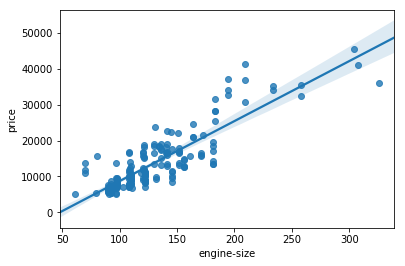

In [22]:
sns.regplot('engine-size', 'price', data =df)

# Categorical variables
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of
categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical
variables is by using boxplots.
Let's

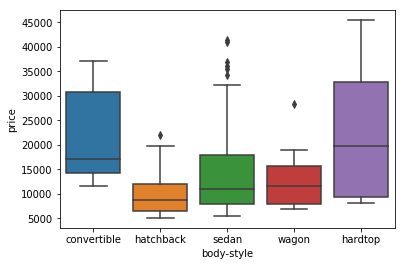

In [23]:
sns.boxplot('body-style', 'price', data =df)

We see that the distributions of price between the different body-style categories have a significant overlap, and
so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

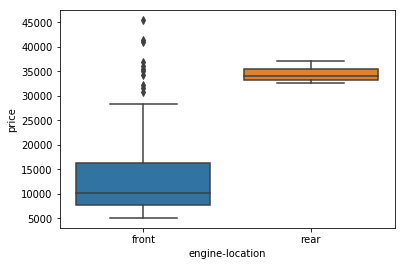

In [24]:
sns.boxplot('engine-location', 'price', data = df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are
distinct enough to take engine-location as a potential good predictor of price.

In [25]:
df['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

# We use value_counts() method to figure out if a varaible is good predictor or not.

In [26]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [27]:
drive_wheels_val_count = df['drive-wheels'].value_counts().to_frame()
drive_wheels_val_count.rename(columns={'drive-wheels' : 'value_counts'}, inplace =True)
drive_wheels_val_count

,value_counts
fwd,118
rwd,75
4wd,8


In [28]:
drive_wheels_val_count.index.name = 'wheel-drive'
drive_wheels_val_count

,value_counts
wheel-drive,
fwd,118
rwd,75
4wd,8


# engine location needs value_counts too beacause it has some categorical data too.

In [29]:
engine_loc_val_count = df['engine-location'].value_counts().to_frame()
engine_loc_val_count.rename(columns = {'engine-location' : 'value-count'}, inplace= True)
engine_loc_val_count.index.name = 'engine-location'
engine_loc_val_count

,value-count
engine-location,
front,198
rear,3


Now we can analyse if these two are good predictors or not, e.g we can see in "engine-location" that there are only 3 rear.. which indecates that engne-location is not a good predictor as it;s data is skewed! 

# Basics of Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several
variables and analysis is performed on the individual groups.

In [30]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [31]:
group_1 = df[['drive-wheels','body-style','price']]
group_1 = group_1.groupby(['drive-wheels'], as_index = False).mean()
group_1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and frontwheel
are approximately the same in price.

Now, we can group multiple variable too.

In [32]:
group_2 = df[['drive-wheels','body-style','price']]
group_2 = group_2.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
group_2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


# This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, 
with one variable along the column and another along the row. We can convert the dataframe to a
pivot table using the method "pivot " to create a pivot table from the groups.
In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the
columns of the table:

In [33]:
group_2 = group_2.pivot(index = 'drive-wheels', columns = 'body-style')
group_2

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [34]:
group_2 = group_2.fillna(0)
group_2

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

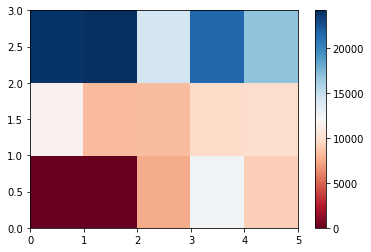

In [35]:
plt.pcolor(group_2, cmap = 'RdBu')
plt.colorbar()
plt.show()

Horizontal represent body-style, vertical left represent drive-wheels and vertical right represent price

# Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.

0: No linear correlation, the two variables most likely do not affect each other.

-1: Total negative linear correlation.

In [36]:
from scipy import stats

when the p-value is <
0.001: we say there is strong evidence that the correlation is significant.

the p-value is <
0.05: there is moderate evidence that the correlation is significant.

the p-value is <
0.1: there is weak evidence that the correlation is significant.

the p-value is>
0.1: there is no evidence that the correlation is significant.


In [37]:
p_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print('The Person Correlation Coefficient is', p_coef , 'and the p-value is =  ', p_value)

('The Person Correlation Coefficient is', 0.5846418222655081, 'and the p-value is =  ', 8.076488270732955e-20)


# Conclusion:

Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although
the linear relationship isn't extremely strong (~0.585)

In [38]:
p_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
p_coef, p_value

(0.8096068016571052, 6.273536270651004e-48)

# Conclusion:

Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the
linear relationship is quite strong (~0.809, close to 1)

# Final Notes after Data Wrangling and Exploratory Data Analysis:

We now have a better idea of what our data looks like and which variables are important to take into account
when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

Length

Width

Curb-weight

Engine-size

Horsepower

City-mpg

Highway-mpg

Wheel-base

Bore

Categorical variables:

Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with
variables that meaningfully affect our target variable will improve our model's prediction performance.

# Module 3: Model Development

we often use Model Development to help us predict future observations from the data we have.
A Model will help us understand the exact relationship between different variables and how these variables are
used to predict the result.

# Simple Linear Regression.
Y = a + bx

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# How could Highway-mpg help us predict car price?

In [41]:
x = df[['highway-mpg']]
y = df['price']
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
pred = lr.predict(x)
pred[0:10]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682])

In [43]:
#checking the value of intercept a
lr.intercept_

38423.305858157386

In [44]:
#checking the value of slope b
lr.coef_

array([-821.73337832])

# How could engine-size help us predict car price?


In [45]:
x = df[['engine-size']]
y= df['price']
lr.fit(x,y)
pred=lr.predict(x)
pred[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

# Multiple Linear Regression
What if we want to predict car price using more than one variable?

In [46]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']
lr.fit(Z,y)
pred = lr.predict(Z)
pred[0:5]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344])

In [47]:
lr.intercept_

-15811.863767729243

In [48]:
lr.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

# Model Evaluation using Visualization

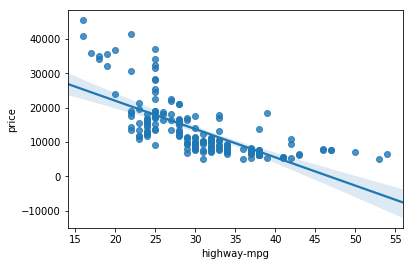

In [49]:
sns.regplot(x = 'highway-mpg', y = 'price', data =df)


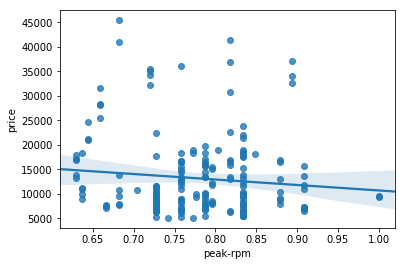

In [50]:
sns.regplot(x = 'peak-rpm', y = 'price', data = df)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are
much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread
around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the
"highway-mpg" increases.

# Residual Plot
We look at the spread of the residuals:
- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is
appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and
thus the linear model is a good fit for this data.

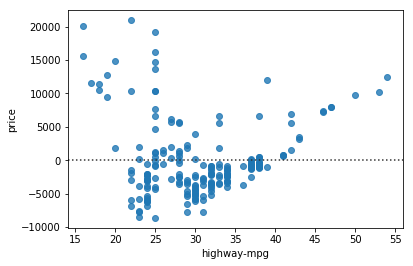

In [51]:
sns.residplot(df['highway-mpg'], df['price'])


We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us
to believe that maybe a non-linear model is more appropriate for this data.

# Multiple Linear Regression
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you
can't visualize it with regression or residual plot.
One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the
fitted values that result from the model and compare it to the distribution of the actual values.

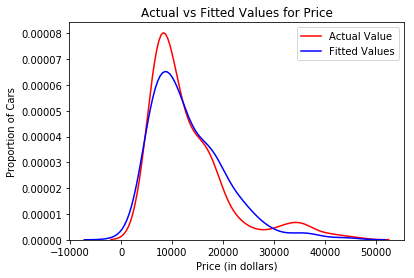

In [52]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a
bit. However, there is definitely some room for improvement.

# Polynomial Regression and Pipelines
Polynomial regression is a particular case of the general linear regression model or multiple linear regression
models.
We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

In [53]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x,y,3) # here we are using numpy beacuse it is now any array ( degree 3)
p = np.poly1d(f) # converting the array to 1d again
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [54]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

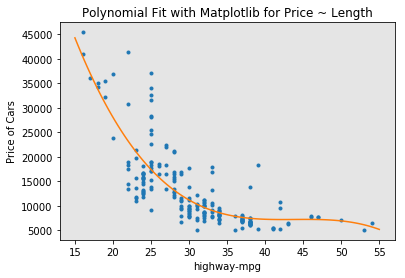

In [55]:
PlotPolly(p, x, y, 'highway-mpg')

In [56]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is
because the generated polynomial function "hits" more of the data points.

In [57]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2) 
pf_z = pf.fit_transform(Z) #Z is already declared above in Multiple linear regression example.



In [58]:
#before transforming ( Pre-processing the data )
Z.shape


(201, 4)

In [59]:
#after transforming ( Pre-processing the data )
pf_z.shape

(201L, 15L)

Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We
also use StandardScaler as a step in our pipeline.

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [61]:
input = [('scale', StandardScaler()), ('polynomial',PolynomialFeatures(include_bias = False)), ('model',LinearRegression())]
pipe = Pipeline(input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [62]:
pipe.fit(Z, y)

C:\Users\Mohsin Ali\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mohsin Ali\Anaconda2\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [63]:
pred = pipe.predict(Z)
pred[0:5]

C:\Users\Mohsin Ali\Anaconda2\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955,
       16135.53737535])

# Measures for In-Sample Evaluation
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative
measure to determine how accurate the model is.
Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared

Mean Squared Error (MSE)

In [64]:
x = df[['highway-mpg']]
y = df['price']
lr.fit(x,y)
print("R-Square error is", lr.score(x,y))

('R-Square error is', 0.4965911884339175)


In [65]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'], pred)
print("Mean Squared error is", mse)

# Now for Multiple Linear Regression and Polynomial Regression.

In [66]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y= df['price']
lr.fit(Z,y)
print("R squared error is ", lr.score(Z, y))

('R squared error is ', 0.8093732522175299)


In [67]:
from sklearn.metrics import r2_score

import the function r2_score from the module metrics as we are using a different function

In [68]:
r_square = r2_score(y,p(x))
print("the r-squared error is", r_square)

('the r-squared error is', 0.6741946663906515)


In [69]:
mse2 = mean_squared_error(y,p(x))
print("MSE is", mse2)

('MSE is', 20474146.42636124)


# Prediction and Decision Making

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how
do we determine a good model fit?

What is a good R-squared value?

When comparing models, the model with the higher R-squared value is a better fit for the data.
What is a good MSE?

When comparing models, the model with the smallest MSE value is a better fit for the data.

# Let's take a look at the values for the different models.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

-----R-squared: 0.49659118843391759

-----MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor
Variables of Price.

-----R-squared: 0.80896354913783497

-----MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

-----R-squared: 0.6741946663906514

-----MSE: 2.05 x 10^7



# Module 4: Model Evaluation and Refinement
We have built models and made predictions of vehicle prices. Now we will determine how accurate these
predictions are.

In [70]:
%%capture
! pip install ipywidgets

In [71]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [72]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #training data
    #testing data
    # lr: linear regression object
    #poly_transform: polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Part 1: Training and Testing
An important step in testing your model is to split your data into training and testing data. We will place the target
data price in a separate dataframe y:

In [73]:
y = df['price']
x = df.drop('price', axis = 1)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state =1)
print("Number of test samples ", x_test.shape[0])
print("number of training samples", x_train.shape[0])

('Number of test samples ', 31)
('number of training samples', 170)


In [76]:
lr.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
lr.score(x_train[['horsepower']], y_train)

0.6450110239384648

In [78]:
lr.score(x_test[['horsepower']], y_test)

0.7076967079117262

# Find the R^2 on the test data using 90% of the data for training data

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1, random_state =1)
print("Train samples :", x_test.shape[0])
print("Test samples :", x_train.shape[0])

('Train samples :', 21)
('Test samples :', 180)


In [80]:
lr.fit(x_train[['horsepower']], y_train)
error = lr.score(x_train[['horsepower']],y_train)
print("R2 score/ training error for training data is :" , error)

('R2 score/ training error for training data is :', 0.662028747521533)


In [81]:
lr.fit(x_test[['horsepower']], y_test)
error2 = lr.score(x_test[['horsepower']],y_test)
print("R2 score/ test error for testing data is :", error2)

('R2 score/ test error for testing data is :', 0.41827774184282707)


# Observation : 
The above experimnet shows higher test error and lower training error this could be the problem of overfitting !

# Cross-validation Score

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
r_cross = cross_val_score(lr,x[['horsepower']],y,cv=4) # cv = 4 is 4 folds
r_cross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [84]:
print("The mean of the folds are", r_cross.mean(), "and the standard deviation is" , r_cross
.std())

('The mean of the folds are', 0.5220592359225417, 'and the standard deviation is', 0.291304806661184)


In [85]:
-1 * cross_val_score(lr,x[['horsepower']], y,cv=4,scoring='neg_mean_squared_error')

array([20251357.78354631, 43743920.05390439, 12525158.34507633,
       17564549.69976652])

# Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature 

In [86]:
rc = cross_val_score(lr,x[['horsepower']],y,cv =2)
rc[1]

0.4434652726647446

In [87]:
from sklearn.model_selection import cross_val_predict

In [88]:
pred = cross_val_predict(lr,x[['horsepower']],y,cv=4)
pred[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

# For understanding/brushing up Cross-validation read : 
    
https://www.kaggle.com/dansbecker/cross-validation

# Part 2: Overfitting, Underfitting and Model Selection

In [89]:
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
pred_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
pred_train[0:5]

array([ 7426.34910902, 28324.42490838, 14212.74872339,  4052.80810192,
       34499.8541269 ])

In [91]:
lr.fit(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
pred_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
pred_test[0:5]

array([ 9624.85531439,  6109.97977865, 11894.65790004,  5951.4654206 ,
       12585.04758398])

Let's perform some model evaluation using our training and testing data separately. First we import the seaborn
and matplotlibb library for plotting.

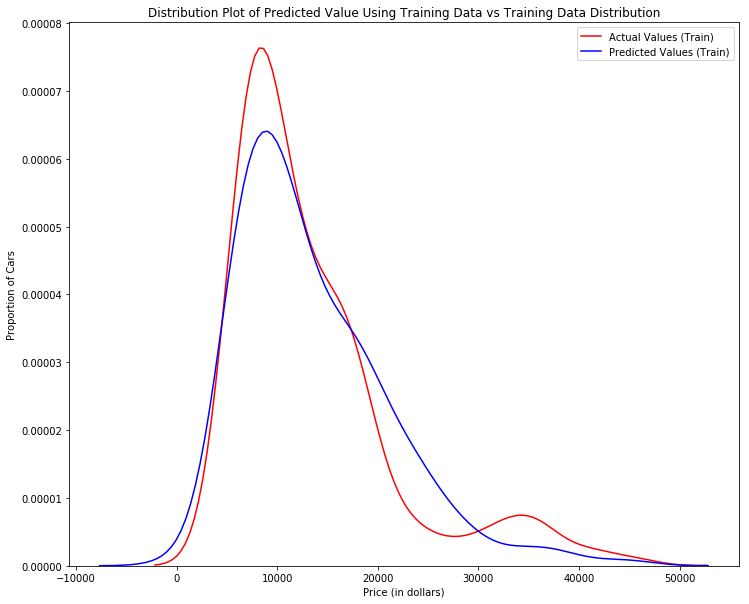

In [93]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, pred_train, "Actual Values (Train)", "Predicted Values (Train)",Title)

# Figure 1:

Plot of predicted values using the training data compared to the training data.

So far the model seems to be doing well in learning from the training dataset. But what happens when the model
encounters new data from the testing dataset? When the model generates new values from the test data, we see
the distribution of the predicted values is much different from the actual target values.

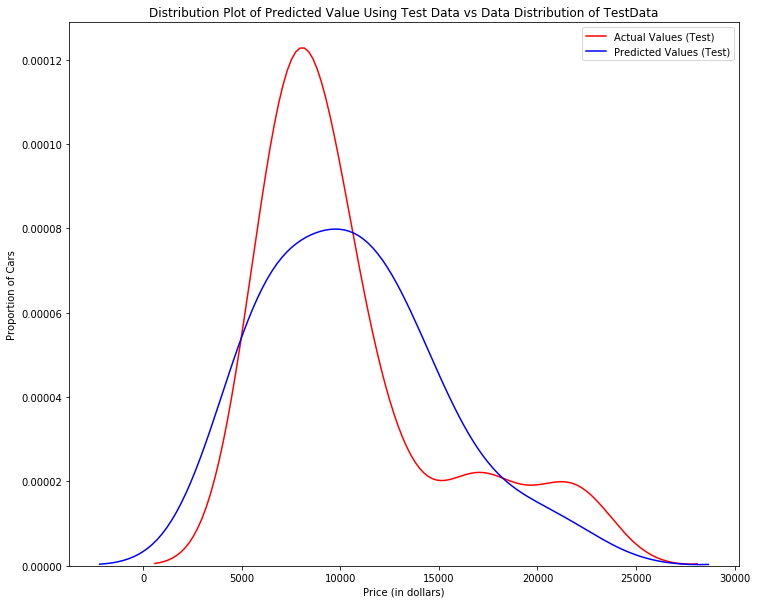

In [94]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of TestData'
DistributionPlot(y_test,pred_test,"Actual Values (Test)","Predicted Values (Test)",Title)

# Figure 2: 
    
Plot of predicted value using the test data compared to the test data.

Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting
the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the
distribution shape is exceptionally different. 

Let's see if polynomial regression also exhibits a drop in the
prediction accuracy when analysing the test dataset.

# Overfitting

Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model
using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that
generated the relationship

In [95]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.45, random_state = 0)

In [96]:
pr = PolynomialFeatures(degree =5)
x_test_pr = pr.fit_transform(x_test[['horsepower']])
x_train_pr = pr.fit_transform(x_train[['horsepower']])

In [97]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
pred = poly.predict(x_test_pr)
pred[0:5]

array([ 6727.63281655,  7306.75934034, 12213.74751449, 18894.94009865,
       19996.72161416])

Let's take the first five predicted values and compare it to the actual targets.

In [99]:
print("Predicted values: ",pred[0:4])
print("Actual values: ", y_test[0:4].values)

('Predicted values: ', array([ 6727.63281655,  7306.75934034, 12213.74751449, 18894.94009865]))
('Actual values: ', array([ 6295, 10698, 13860, 13499]))


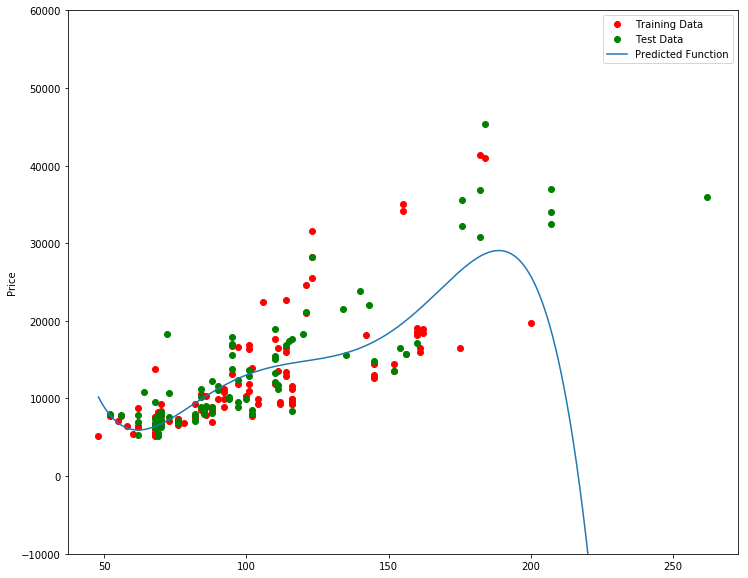

In [100]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

# Figure 4 
A polynomial regression model, red dots represent training data, green dots represent test data, and the
blue line represents the model prediction.
We see that the estimated function appears to track the data but around 200 horsepower, the function begins to
diverge from the data points.

R^2 of the training data:

In [101]:
poly.score(x_train_pr,y_train)

0.5568527851391447

R^2 of the training data:

In [102]:
poly.score(x_test_pr, y_test)

-29.815859734945914

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the
worse the model, a Negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3,0.75,'Maximum R^2 ')

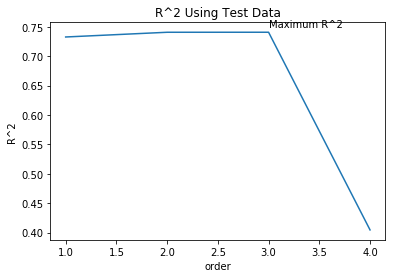

In [103]:
Rsqu_test = []
order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

We see the R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically
decreases at four.

# We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two?

In [104]:
pr1 = PolynomialFeatures(degree = 2)

# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform" ?

In [105]:
x_test_tr = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size']])
x_train_tr = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size']])

# How many dimensions does the new feature have? Hint: use the attribute "shape"

In [106]:
x_test_tr.shape

(91L, 10L)

In [107]:
x_train_tr.shape

(110L, 10L)

# Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features?

In [108]:
poly1 = LinearRegression()
poly1.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted output vs the test data?

In [109]:
pred = poly1.predict(x_test_pr)
pred[0:5]

array([ 7421.79496725,  7805.05904997, 11278.25770274, 19951.62639162,
       20497.25118872])

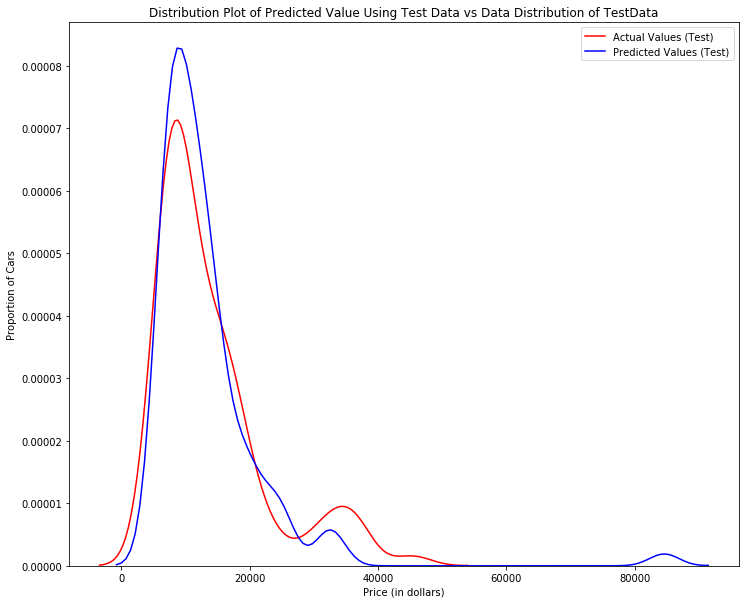

In [110]:
DistributionPlot(y_test,pred,"Actual Values (Test)","Predicted Values (Test)",Title)

# Part 3: Ridge Regression

Ridge regression is an extension for linear regression. It’s basically a regularized linear regression model. The λ parameter is a scalar that should be learned as well, using a method called cross validation that will be discussed in another post.

A super important fact we need to notice about ridge regression is that it enforces the β coefficients to be lower, but it does not enforce them to be zero. That is, it will not get rid of irrelevant features but rather minimize their impact on the trained model.  --------  ### It penalizes the Theta so that model don't get overfit. ! 

we will review Ridge Regression we will see how the parameter Alfa changes the model. Just a
note here our test data will be used as validation data.
Let's perform a degree two polynomial transformation on our data.

In [111]:
pr_r = PolynomialFeatures(degree = 2)
x_test_r = pr_r.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_train_r = pr_r.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [112]:
from sklearn.linear_model import Ridge

In [113]:
ridge_reg = Ridge(alpha = 0.1 ) # her alpha is lamdba or Regulrization constant which penlaizes the theata.

In [114]:
ridge_reg.fit(x_train_r, y_train)

C:\Users\Mohsin Ali\Anaconda2\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [115]:
pred_r = ridge_reg.predict(x_test_r)
pred_r[0:5]

array([ 6569.10080596,  9595.96953031, 20834.19869603, 19347.43557722,
       21404.12568533])

In [116]:
ridge_reg.score(x_test_r, y_test)

0.5266807591709594

In [117]:
print("Actual :", y_test[0:4].values)
print("predicted: ", pred_r[0:4])

('Actual :', array([ 6295, 10698, 13860, 13499]))
('predicted: ', array([ 6569.10080596,  9595.96953031, 20834.19869603, 19347.43557722]))


We select the value of Alfa that minimizes the test error, for example, we can use a for loop.

In [118]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

C:\Users\Mohsin Ali\Anaconda2\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.17184e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mohsin Ali\Anaconda2\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.34367e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mohsin Ali\Anaconda2\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.51551e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mohsin Ali\Anaconda2\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.68734e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mohsin Ali\Anaconda2\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.85918e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mohsin Ali\Anaconda2\lib\site-p

We can plot out the value of R^2 for different Alphas

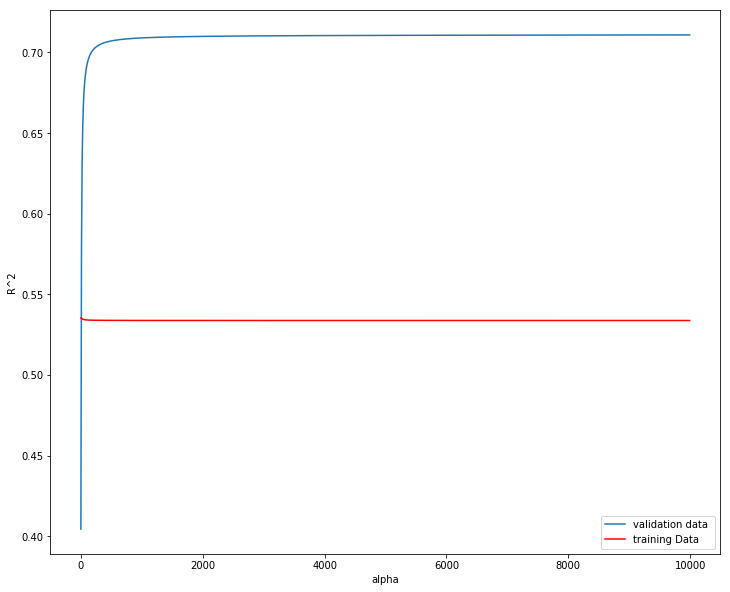

In [119]:
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.plot(ALFA,Rsqu_test, label='validation data ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

# Figure 6: 

The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training
data. The x-axis represents the different values of Alfa
The red line in figure 6 represents the R^2 of the test data, as Alpha increases the R^2 decreases; therefore as
Alfa increases the model performs worse on the test data. The blue line represents the R^2 on the validation
data, as the value for Alfa increases the R^2 decreases.

# Part 4: Grid Search

The term Alfa is a hyperparameter, sklearn has the class GridSearchCV to make the process of finding the best
hyperparameter simpler and Automatic --- Note: We were using loop to find Aplha above.

Let's import GridSearchCV from the module model_selection.

In [120]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:

In [121]:
parms = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

In [122]:
r_reg2 = Ridge()

In [123]:
grid = GridSearchCV(r_reg2, parms,cv =4)

In [124]:
grid.fit(x[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y)

C:\Users\Mohsin Ali\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
best_reg = grid.best_estimator_
best_reg

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [126]:
best_reg.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411781387793232

In any given data there are some steps involved observed after completing this notebook:
# Data Wrangling
•	Cleaning the data which involves replacing null values with appropriate values such as mean and frequency

•	Standardization of data

•	Normalization
# Exploratory Data Analysis
•	First we check the type of data to determine what should be the right visualization tool for each data type

•	We can do: Correlation to see the effectiveness of features, regression plot to see the effectiveness of features on target variable but all of this on numerical data.

•	For categorical data: Boxplots and value count functions to determine the effectiveness.

•	Grouping is another way of analysis in which serval features are grouped together to see their effect on target variable also pivot is way to visualize this data easily

•	Heat maps can be used to see the effect of these groups on target

•	 Pearson correlation can be used to see the relation between features and target variable using P-values.
# Model Development
•	Finally, after getting everything ready we predict future values using the data we have through some model i.e. Linear Regression, multiple linear regression or Polynomial regression (there are many other models as well for different problems)

•	For Visualization i.e. what model should be used the Regression plots and Residual plots can be used but in the case of multiple linear regression when we have more than one features we can use Distribution Plots.

•	Pipeline is useful way to develop a model in which we give type of model, scale and type of regression as parameters.

•	Then after fitting the model we can compare the models using in-sample evaluation to determine which model is better for specific problem for that we can use R-Squared and Mean squared error Note: The smallest the MSE the better and the larger the R-Squared the better the model is.
# Model Evaluation and refinement
•	Import way to get the best results from any model is to split the data in Training and testing because if we don’t and present all the data to model for training it would be known to the model.

•	Again we can use R-Squared on training and testing data to check if the learning algorithm is suffering from Underfitting or Overfitting

•	Cross-validation-score is another method to find the error using specific number of folds.

•	We can visualize overfitting and underfitting using Distribution plots after fitting the model (Liner Regression and polynomial regression etc.) 
# Ridge regression and Grid Search
•	Ridge regression is an extension for linear regression. It’s basically a regularized linear regression model.

•	It penalizes the Theta so that model doesn’t get overfit.

•	There is regularization term Alpha in Ridge regression responsible for penalizing theta.

•	The term Alfa is a hyperparameter, sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler and Automatic.




--------------------------------------------------END-------------------------------------------------------------